In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np
datapath="/home/felix/spiced/03_week/data/"

In [182]:
df_bike_train = pd.read_csv(datapath+'bike_train.csv', parse_dates=True, index_col=0)

In [185]:
df=df_bike_train
df["weather"].replace(4,3, inplace=True)

In [125]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

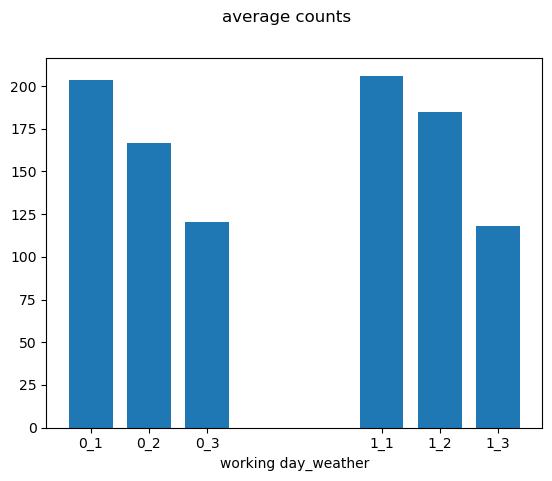

In [5]:
group=df.groupby(["workingday","weather"])["count"]

wds=[]
avsum=[]
weathers=[]
for (wd,weather),b in group:
    wds.append(wd)
    weathers.append(weather)
    avsum.append(b.sum()/len(b))

fig=plt.figure()
ax=fig.add_subplot(111)
xs=np.array(weathers)*0.2+np.array(wds)-0.4
plt.bar(xs,avsum, width=0.15)
ax.set_xticks(xs)
ax.set_xticklabels(["0_1","0_2","0_3","1_1","1_2","1_3"])
plt.suptitle("average counts")
plt.xlabel("working day_weather");

<AxesSubplot:xlabel='workingday', ylabel='count'>

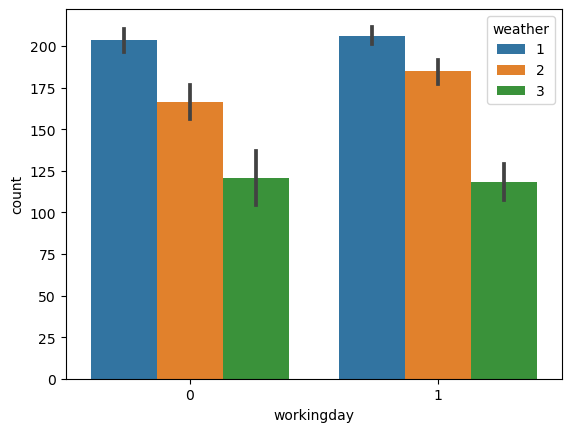

In [186]:
sns.barplot(data=df, y="count", x="workingday" , hue="weather")

<AxesSubplot:xlabel='weather', ylabel='count'>

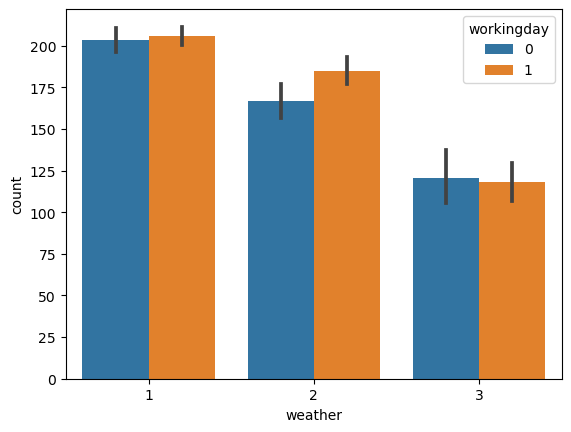

In [181]:
sns.barplot(data=df, y="count", hue="workingday" , x="weather")

In [189]:
df["hour"]=[i.hour for i in df.index]

In [195]:
df["dayname"]=[i.day_name() for i in df.index]
df["year"]=[i.year for i in df.index]
df["month"]=[i.month for i in df.index]

In [10]:
a=df.index[0]

<AxesSubplot:xlabel='hour', ylabel='count'>

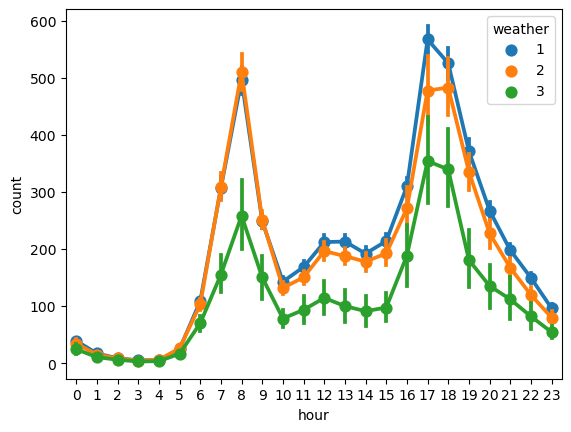

In [11]:
sns.pointplot(data=df[(df["workingday"]==1)],x="hour",y="count", hue="weather")

<AxesSubplot:xlabel='hour', ylabel='count'>

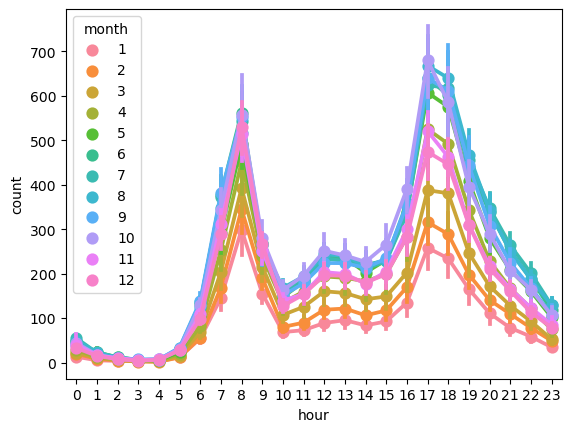

In [196]:
sns.pointplot(data=df[(df["workingday"]==1)],x="hour",y="count", hue="month")

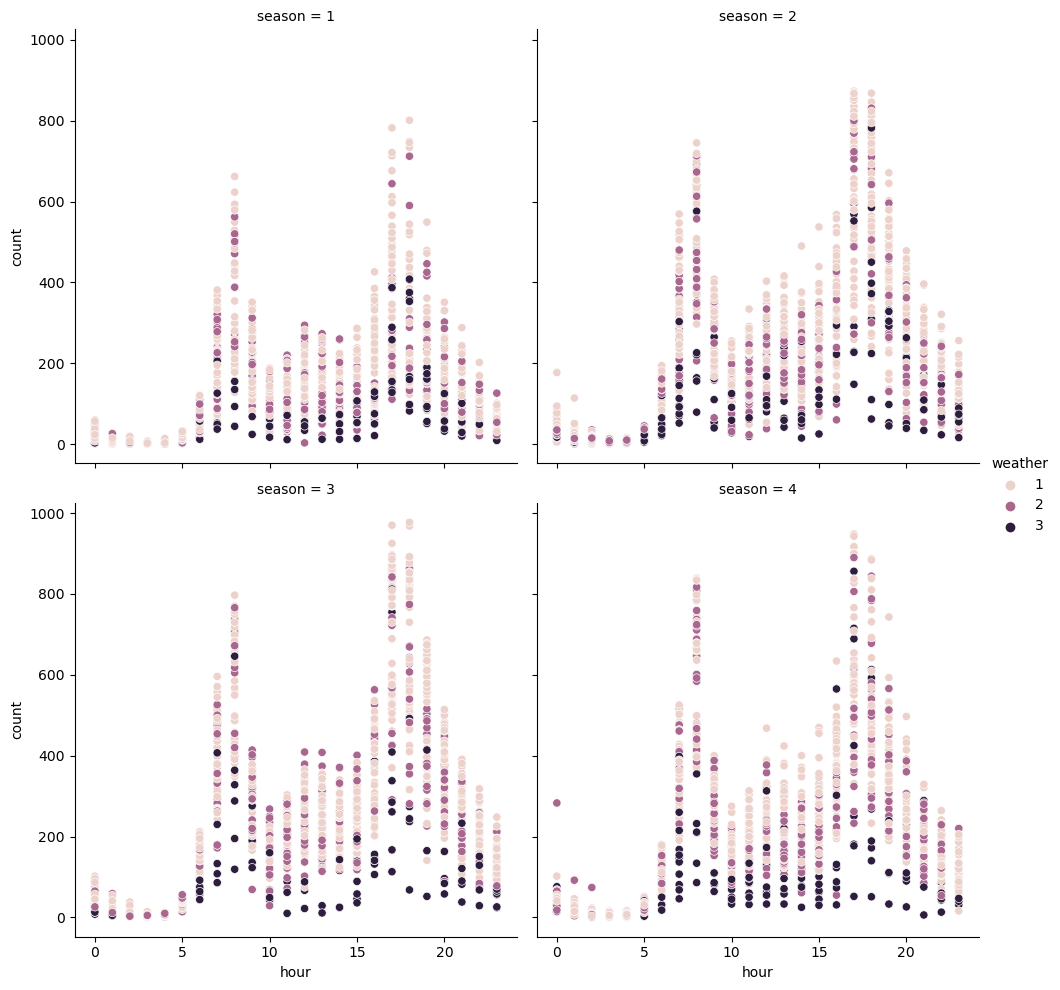

In [12]:
sns.relplot(data=df[df["workingday"]==1],x="hour",y="count", hue="weather", col="season", col_wrap=2)

In [13]:
#df_jan_2011=df['2011-01-01':'2011-01-31']#

# downsample
#df_jan_2011.resample('D')["count"].sum()

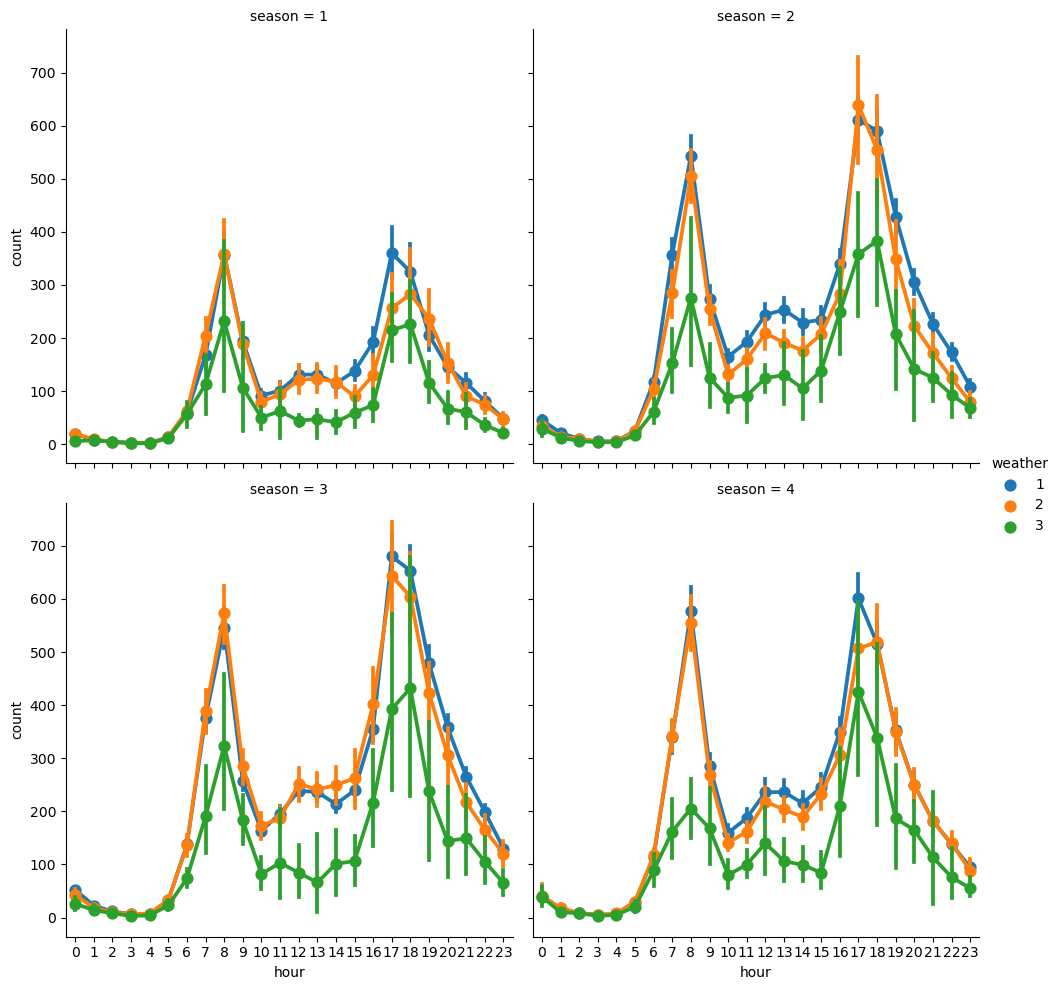

In [14]:
sns.catplot(data=df[df["workingday"]==1], x="hour", y="count", col="season", hue="weather", col_wrap=2, kind="point")


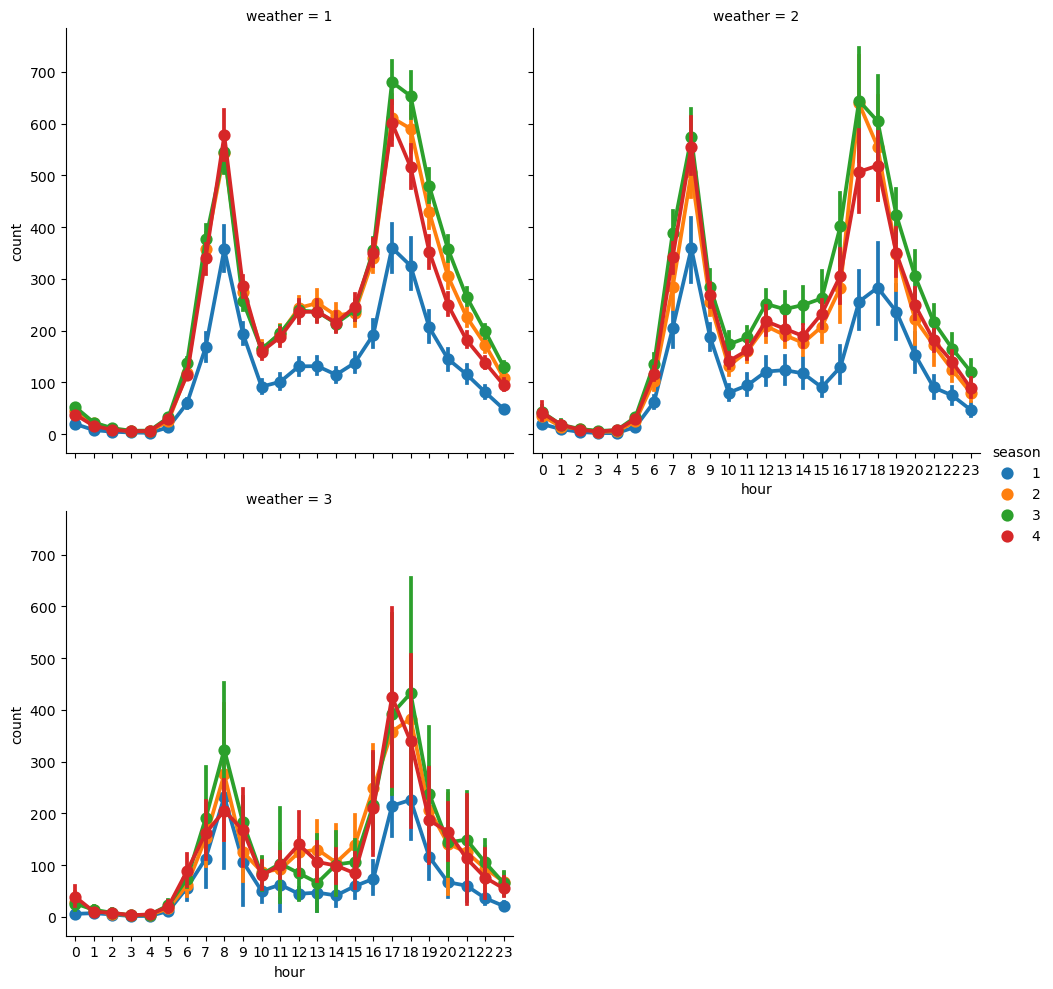

In [15]:
sns.catplot(data=df[df["workingday"]==1], x="hour", y="count", col="weather", hue="season", col_wrap=2, kind="point")

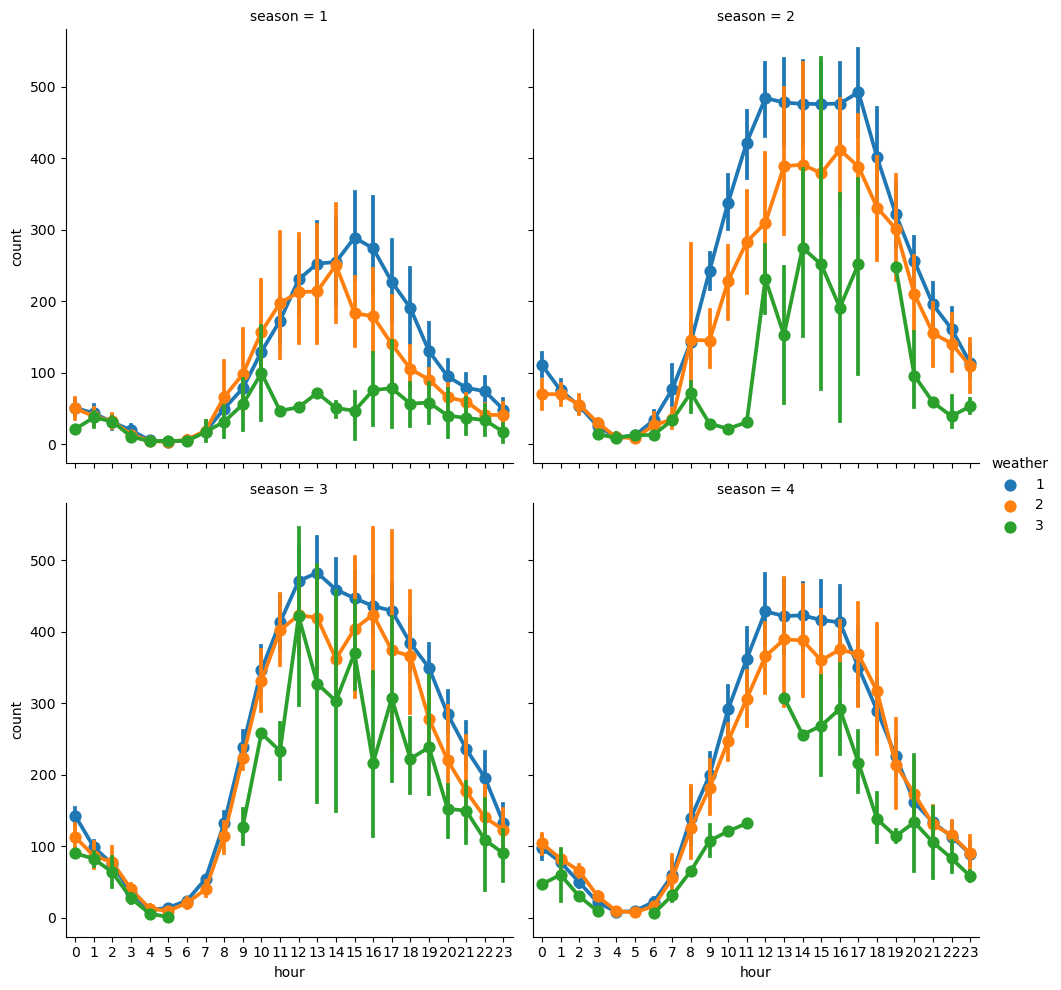

In [16]:
sns.catplot(data=df[df["workingday"]==0], x="hour", y="count", col="season", hue="weather", col_wrap=2, kind="point")

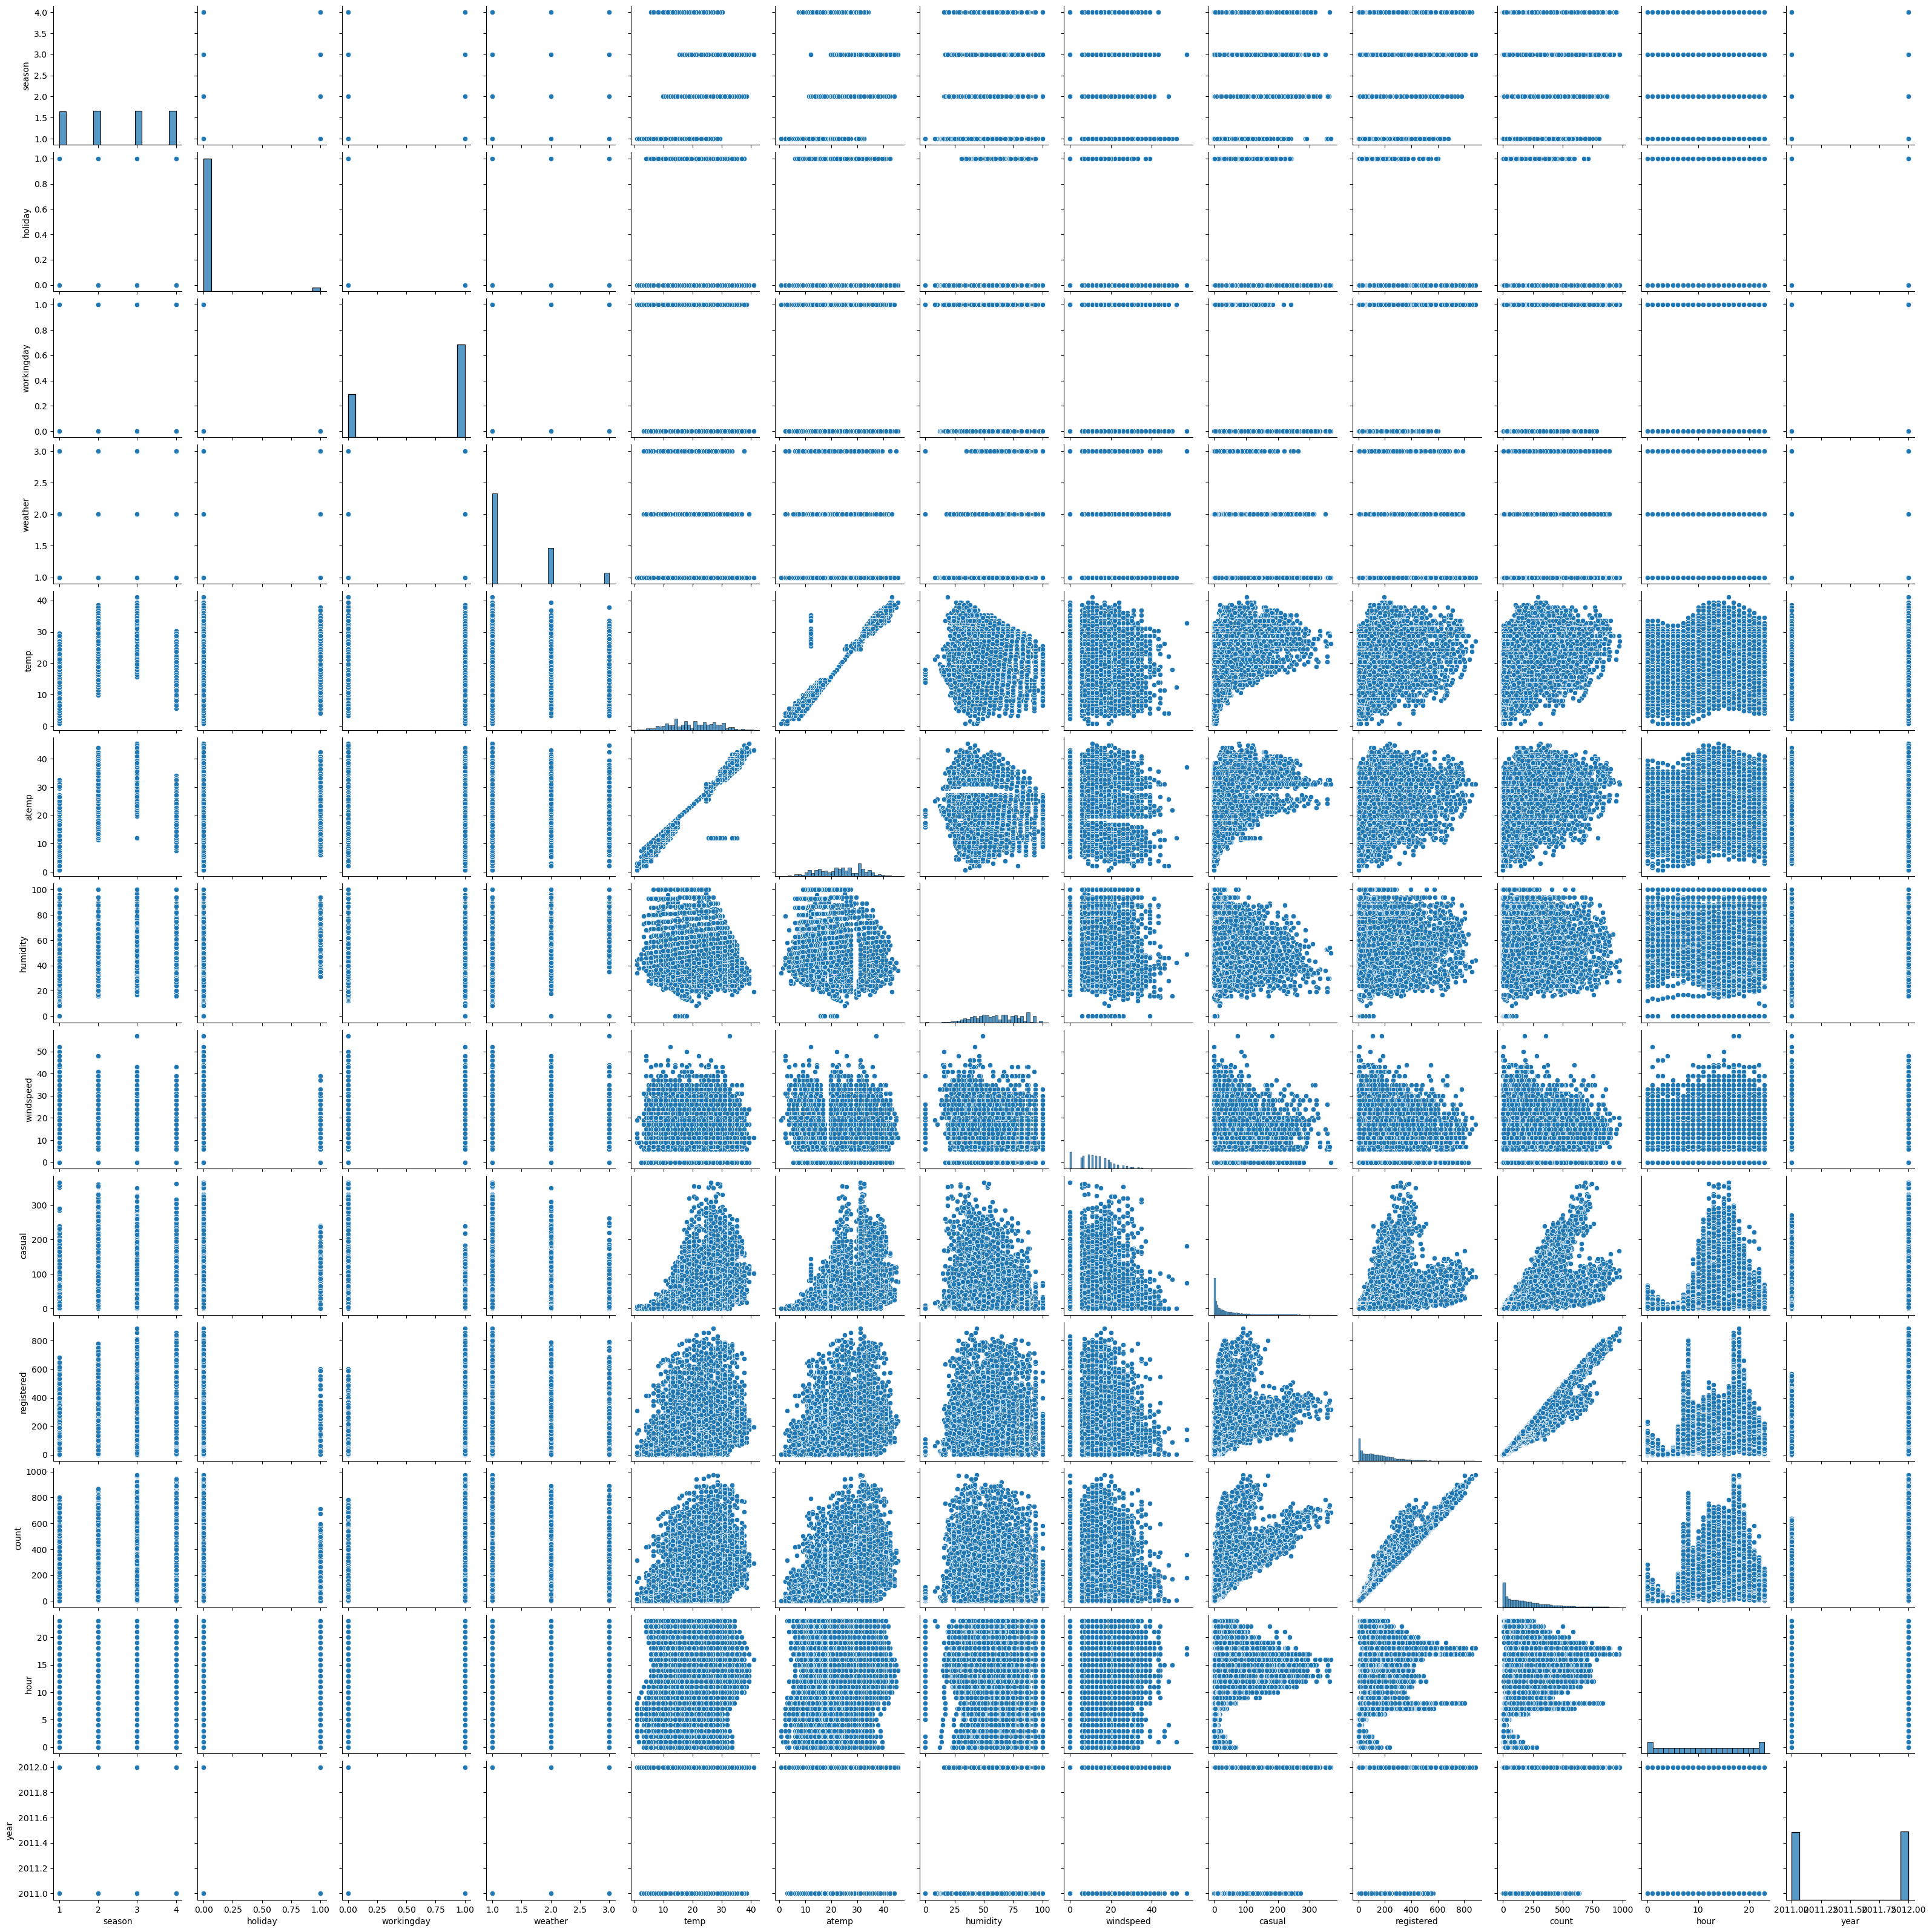

In [17]:
sns.pairplot(df)

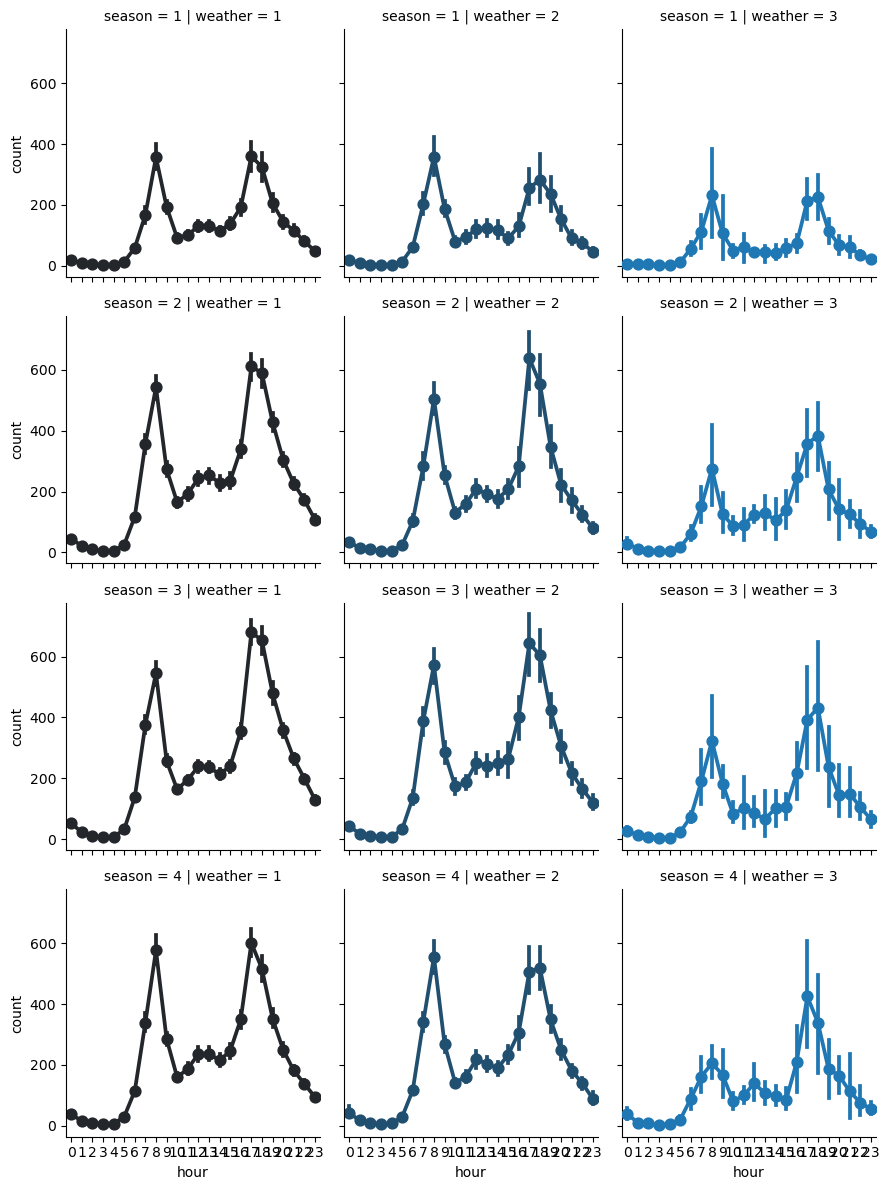

In [18]:
g=sns.FacetGrid(df[df["workingday"]==1], row="season", col="weather");

g=g.map(sns.pointplot, "hour","count","weather", order=range(24), hue_order=[1,2,3])

In [128]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour',
       'dayname', 'year'],
      dtype='object')

In [129]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418335     20.23086   
std        1.116174      0.166599      0.466159      0.633537      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      3.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count          hour          year  
count  10886.000000  10886.000000  10886.000000  
mean     191.574132     11.541613   2011.501929  
std      181.144454      6.915838      0.500019  
min        1.000000      0.000000   2011.000000  
25%       42.000000      6.000000   2011.000000  
50%      145.000000     12.000000   2012.000000  
75%      284.000000     18.000000   2012.000000  
max      977.000000     23.000000   2012.000000

In [130]:
cat_features=['season', 'holiday', 'workingday', 'weather', "count"]
num_features=['temp', 'humidity', 'atemp','windspeed', 'casual', 'registered',  'hour','count']

<AxesSubplot:>

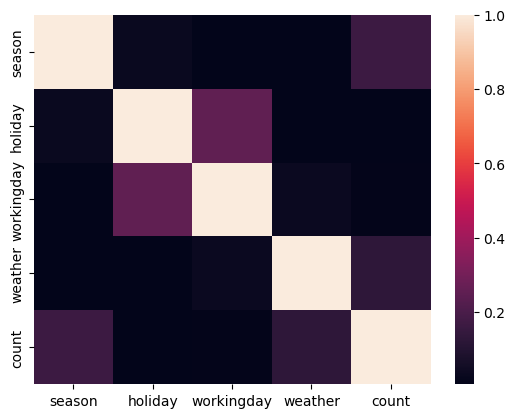

In [23]:
sns.heatmap(np.abs(df[cat_features].corr(method='pearson', min_periods=1)))

<AxesSubplot:>

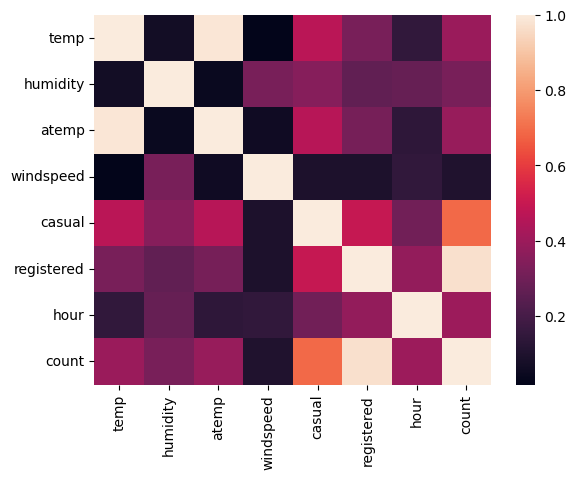

In [192]:
sns.heatmap(np.abs(df[num_features].corr()))

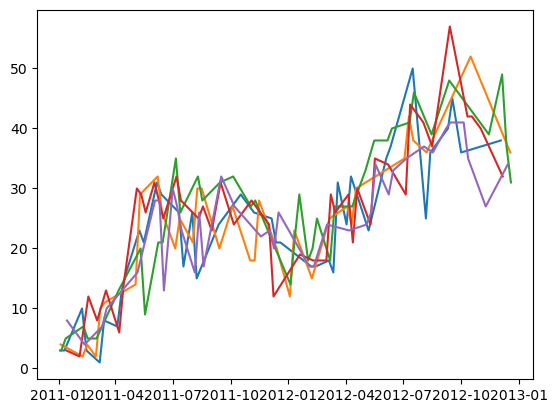

In [131]:
for dayname in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]:
    subdf=df[(df["workingday"]==1) * (df["hour"]==5) * (df["weather"]==1)*(df["dayname"]==dayname)]
    plt.plot(subdf.index, subdf["count"])

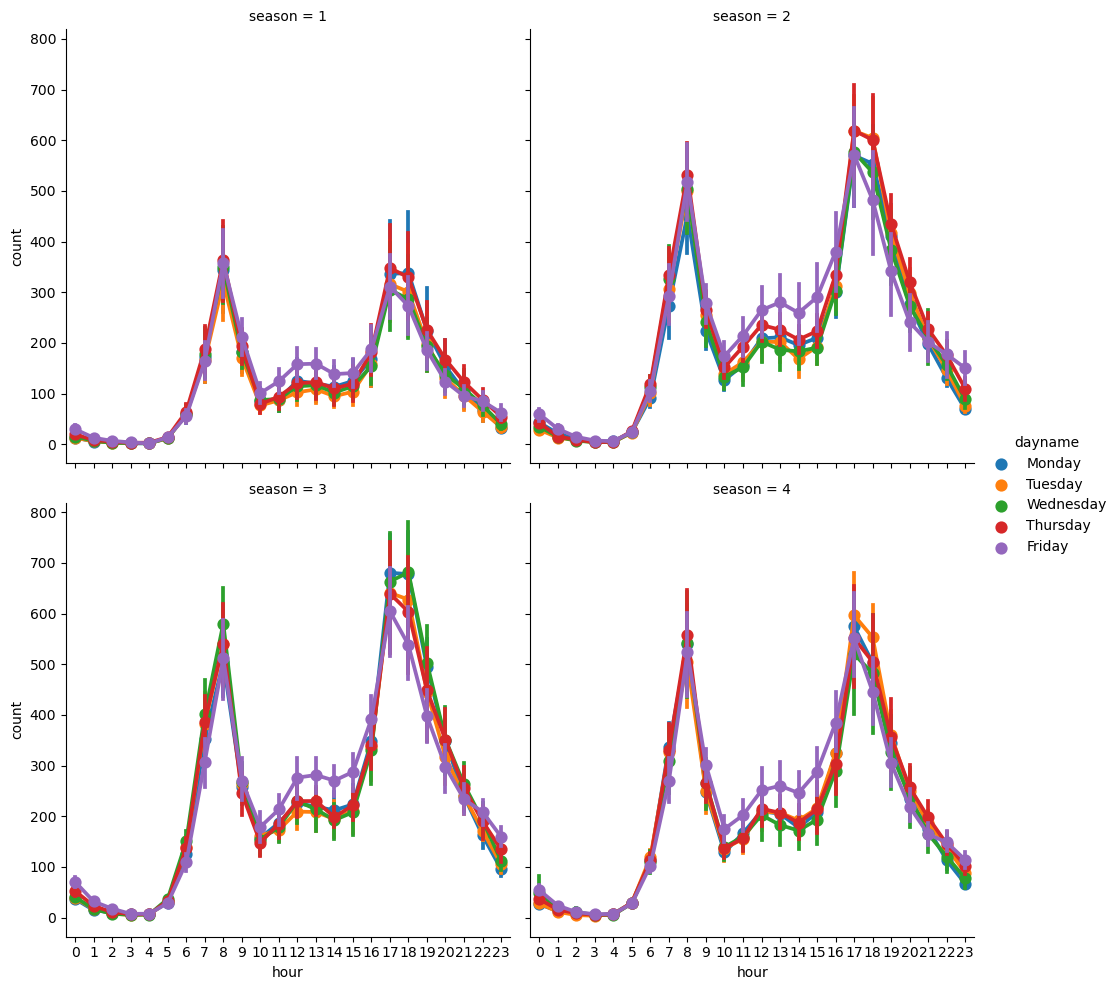

In [26]:
sns.catplot(data=df[df["workingday"]==1], x="hour", y="count", col="season", hue="dayname", col_wrap=2, kind="point")

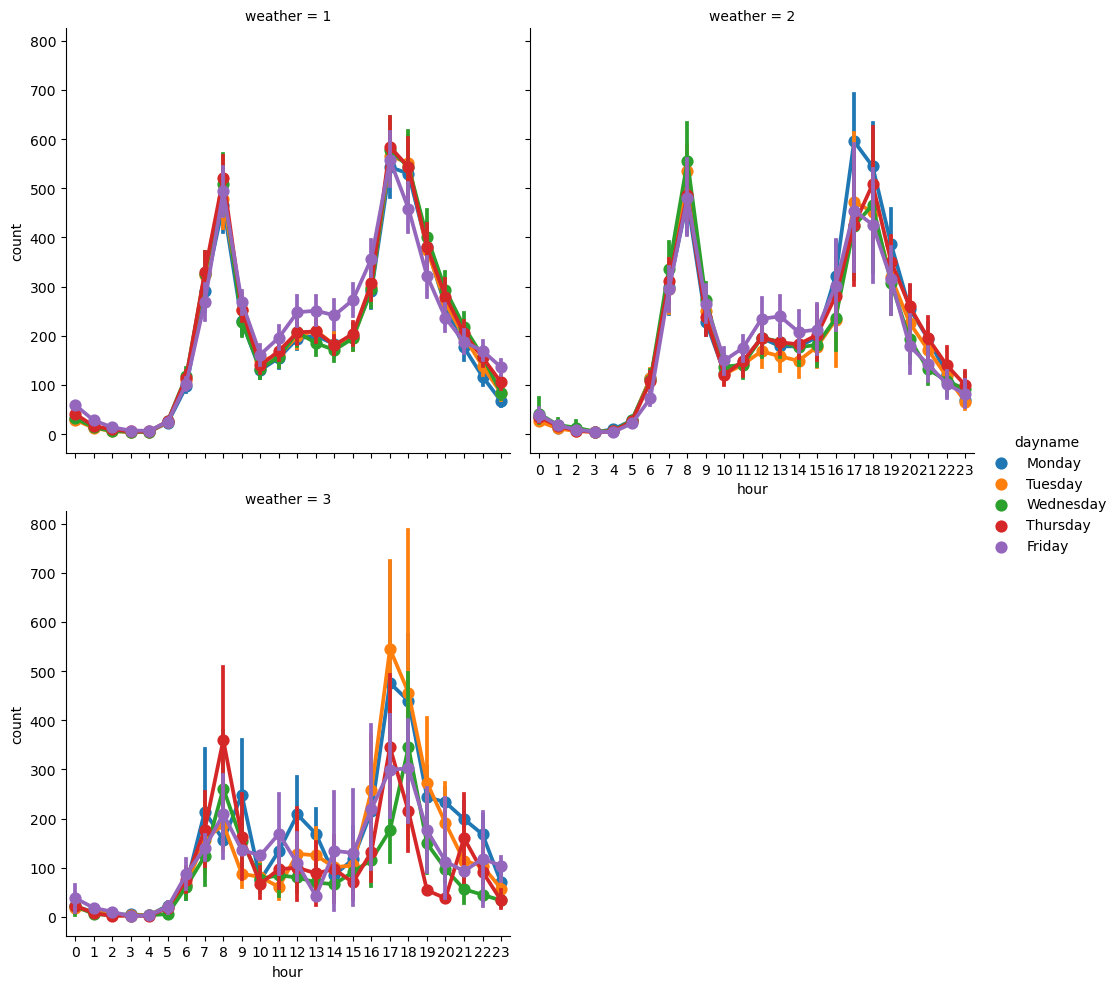

In [27]:
sns.catplot(data=df[df["workingday"]==1], x="hour", y="count", col="weather", hue="dayname", col_wrap=2, kind="point")

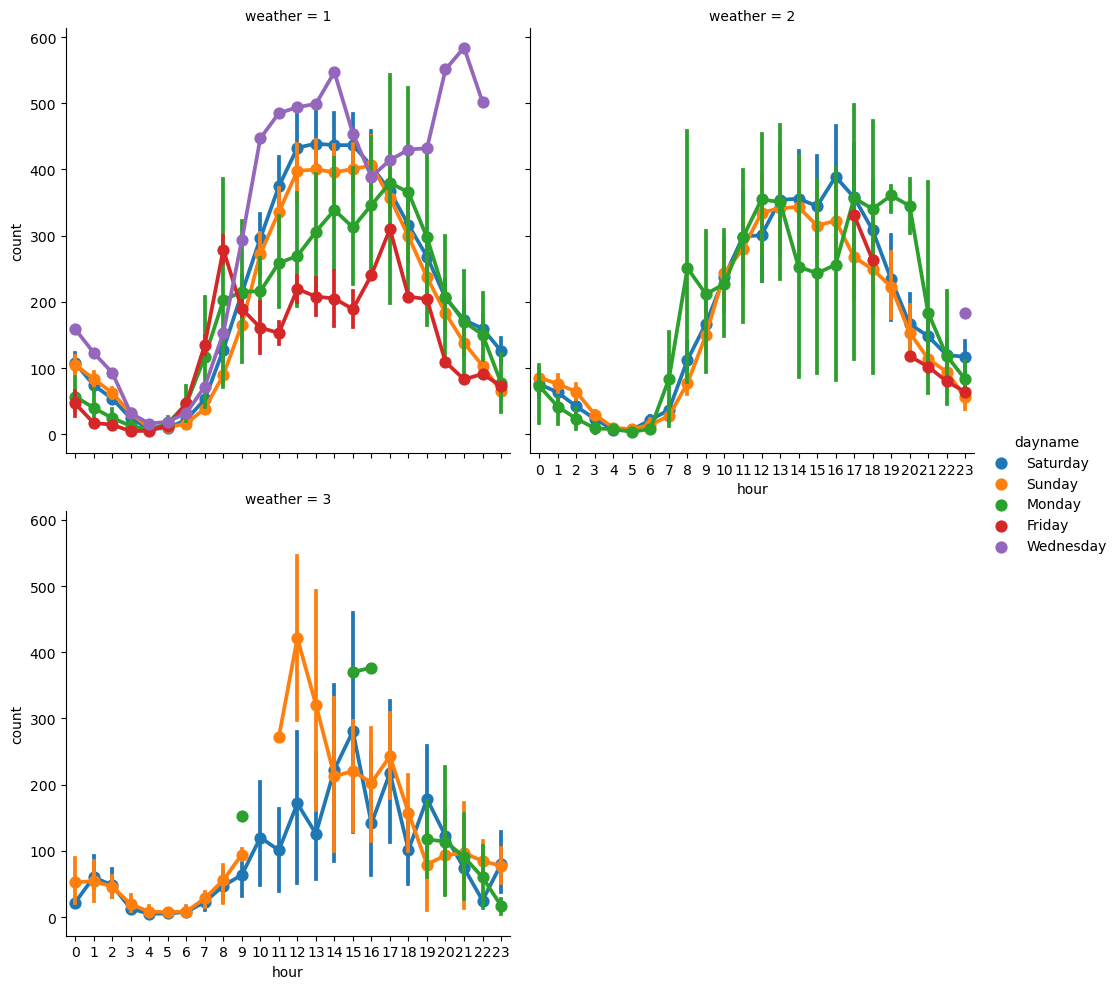

In [28]:
sns.catplot(data=df[df["workingday"]==0], x="hour", y="count", col="weather", hue="dayname", col_wrap=2, kind="point")

In [30]:
from sklearn.model_selection import train_test_split


In [132]:
df_train,df_test=train_test_split(df)

In [133]:
df_train.sort_index(inplace=True)

In [134]:
df_test.sort_index(inplace=True)

In [135]:
from sklearn.linear_model import LinearRegression

<AxesSubplot:ylabel='Count'>

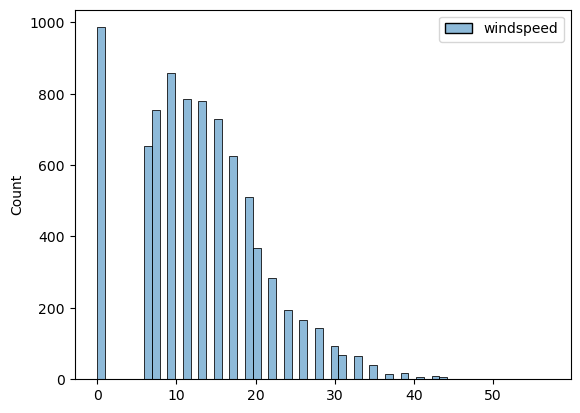

In [136]:
sns.histplot(df_train[["windspeed"]])

In [52]:


#df_train["cat_wind"] = pd.cut(df_train['windspeed'], bins=[-0.001, 10, 20, 60], labels=['light', 'medium', 'heavy'])

#print((bins=="light").sum())
#print((bins=="medium").sum())
#print((bins=="heavy").sum())

3206
3859
1099


In [145]:
    

dflist=[]
for i,df in enumerate([df_train,df_test]):
    dflist.append(pd.get_dummies(df,"dayname", drop_first=True))
    dflist[i]["atemp_sc"]=(dflist[i]["atemp"]-dflist[i]["atemp"].mean())/dflist[i]["atemp"].std()
    dflist[i]["windspeed_sc"]=(dflist[i]["windspeed"])/(2*dflist[i]["windspeed"].std())
    dflist[i]["cat_wind"] = pd.cut(df_train['windspeed'], bins=[-0.001, 10, 20, 60], labels=['low', 'medium', 'high'])
    dflist[i]=pd.get_dummies(dflist[i],"cat_wind", drop_first=True)
    dflist[i]["cat_atemp"] = pd.cut(df_train['atemp'], bins=[-70, 0, 10, 20,70], labels=['freez','low', 'medium', 'high'])
    dflist[i]=pd.get_dummies(dflist[i],"cat_atemp", drop_first=True)
    dflist[i]=dflist[i].drop("atemp", axis=1)
    dflist[i]["month"]=np.array([ind.month+(ind.year-2011)*12 for ind in dflist[i].index])
dftrain,dftest=dflist

In [138]:
dftrain.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'hour', 'year',
       'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
       'cat_wind_medium', 'cat_wind_high', 'cat_atemp_low', 'cat_atemp_medium',
       'cat_atemp_high', 'month'],
      dtype='object')

In [139]:
plt.plot(dftrain["windspeed_sc"], "k-", )
plt.plot(dftrain["atemp_sc"], "g-")
plt.plot(dftrain[dftrain["cat_wind"]=="high"]["cat_wind"]=="high", ".")

KeyError: 'windspeed_sc'

In [ ]:
#Xtrain=dftrain[['season', 'workingday', 'weather', 
#        'hour','dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
#       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday', 'atemp_sc',
#       'windspeed_sc']]

In [140]:
dftrain.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'hour', 'year',
       'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
       'cat_wind_medium', 'cat_wind_high', 'cat_atemp_low', 'cat_atemp_medium',
       'cat_atemp_high', 'month'],
      dtype='object')

(239, 5) (239,)
0.7625174093091632
0.8059125352396762


Text(0.5, 1.0, 'Test data')

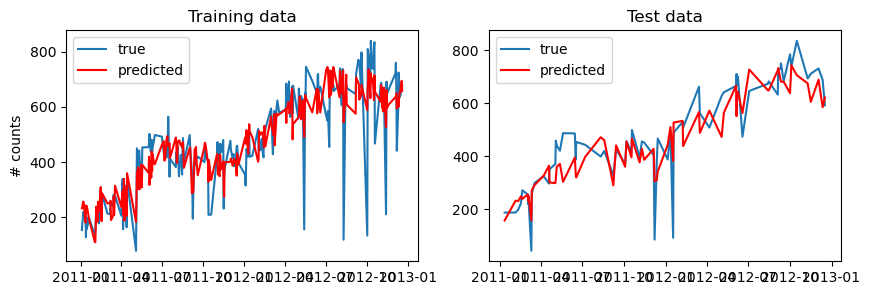

In [174]:
hour=8
workingday=1

df_wd=dftrain[(dftrain["workingday"]==workingday)*(dftrain["hour"]==hour)]

use_cat=False
use_days=False

if use_cat:
    Xtrain=df_wd[['season', 'month' ,'year','weather', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
         'cat_wind_medium', 'cat_wind_high', 'cat_atemp_low', 'cat_atemp_medium',
       'cat_atemp_high'  ]]

elif use_days:
    Xtrain=df_wd[['season', 'year' ,'weather',  'atemp_sc','windspeed_sc', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
        'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday']]
else:
    Xtrain=df_wd[['season', 'year' ,'weather',  'atemp_sc','windspeed_sc']]

Ytrain=df_wd["count"]




print(Xtrain.shape, Ytrain.shape)

df_wd2=dftest[(dftest["workingday"]==1)*(dftest["hour"]==hour)]

if use_cat:
    Xtest=df_wd2[['season', 'month' ,'year','weather', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
         'cat_wind_medium', 'cat_wind_high', 'cat_atemp_low', 'cat_atemp_medium',
       'cat_atemp_high'  ]]
elif use_days:
    Xtest=df_wd2[['season', 'year' ,'weather',  'atemp_sc','windspeed_sc', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
        'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday']]
else:
    Xtest=df_wd2[['season', 'year' ,'weather',  'atemp_sc','windspeed_sc']]

Ytest=df_wd2["count"]


m=LinearRegression()
m.fit(Xtrain,Ytrain)


#import sys
#sys.exit()
print(m.score(Xtrain,Ytrain))
print(m.score(Xtest,Ytest))

fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(Ytrain, label="true")
ax1.plot(Ytrain.index,m.predict(Xtrain), "r-", label="predicted")
ax2.plot(Ytest, label="true")
ax2.plot(Ytest.index,m.predict(Xtest), "r-", label="predicted")

ax1.set_ylabel("# counts")

ax1.legend()
ax2.legend()

ax1.set_title("Training data")
ax2.set_title("Test data")

(239, 5) (239,)
0.7625174093091632
0.8059125352396762


Text(0.5, 1.0, 'Test data')

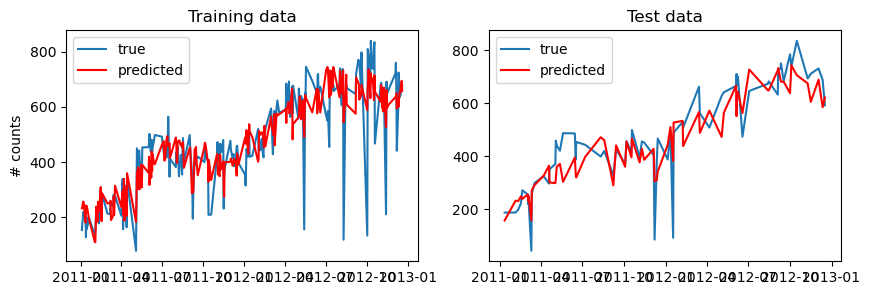

In [178]:
hour=8
workingday=1

df_wd=dftrain[(dftrain["workingday"]==workingday)*(dftrain["hour"]==hour)]

use_cat=False
use_days=False

if use_cat:
    Xtrain=df_wd[['season', 'month' ,'year','weather', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
         'cat_wind_medium', 'cat_wind_high', 'cat_atemp_low', 'cat_atemp_medium',
       'cat_atemp_high'  ]]

elif use_days:
    Xtrain=df_wd[['season', 'year' ,'weather',  'atemp_sc','windspeed_sc', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
        'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday']]
else:
    Xtrain=df_wd[['season', 'year' ,'weather',  'atemp_sc','windspeed_sc']]

Ytrain=df_wd["count"]




print(Xtrain.shape, Ytrain.shape)

df_wd2=dftest[(dftest["workingday"]==1)*(dftest["hour"]==hour)]

if use_cat:
    Xtest=df_wd2[['season', 'month' ,'year','weather', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
         'cat_wind_medium', 'cat_wind_high', 'cat_atemp_low', 'cat_atemp_medium',
       'cat_atemp_high'  ]]
elif use_days:
    Xtest=df_wd2[['season', 'year' ,'weather',  'atemp_sc','windspeed_sc', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
        'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday']]
else:
    Xtest=df_wd2[['season', 'year' ,'weather',  'atemp_sc','windspeed_sc']]

Ytest=df_wd2["count"]


m=LinearRegression()
m.fit(Xtrain,Ytrain)


#import sys
#sys.exit()
print(m.score(Xtrain,Ytrain))
print(m.score(Xtest,Ytest))

fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(Ytrain, label="true")
ax1.plot(Ytrain.index,m.predict(Xtrain), "r-", label="predicted")
ax2.plot(Ytest, label="true")
ax2.plot(Ytest.index,m.predict(Xtest), "r-", label="predicted")

ax1.set_ylabel("# counts")

ax1.legend()
ax2.legend()

ax1.set_title("Training data")
ax2.set_title("Test data")

(5547, 6) (5547,)
0.33899142067112453
0.323918932607384


Text(0.5, 1.0, 'Test data')

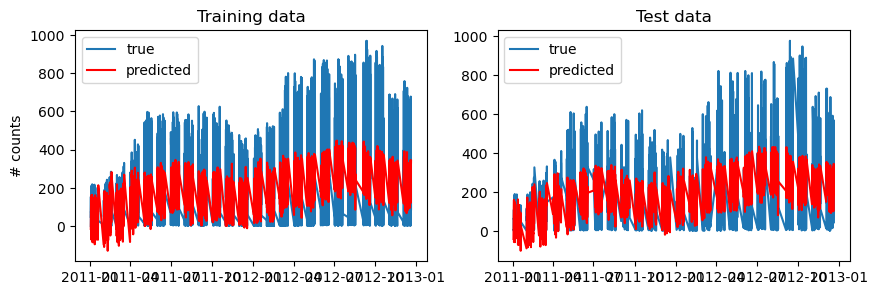

In [176]:
#hour=8
workingday=1

df_wd=dftrain[(dftrain["workingday"]==workingday)]

use_cat=False
use_days=False

if use_cat:
    Xtrain=df_wd[['season', 'month' ,'year','weather', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
         'cat_wind_medium', 'cat_wind_high', 'cat_atemp_low', 'cat_atemp_medium',
       'cat_atemp_high'  ]]

elif use_days:
    Xtrain=df_wd[['season', 'year' ,'hour','weather',  'atemp_sc','windspeed_sc', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
        'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday']]
else:
    Xtrain=df_wd[['season', 'year' ,'hour','weather',  'atemp_sc','windspeed_sc']]

Ytrain=df_wd["count"]




print(Xtrain.shape, Ytrain.shape)

df_wd2=dftest[(dftest["workingday"]==1)]

if use_cat:
    Xtest=df_wd2[['season', 'month' ,'year','weather', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
       'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday',
         'cat_wind_medium', 'cat_wind_high', 'cat_atemp_low', 'cat_atemp_medium',
       'cat_atemp_high'  ]]
elif use_days:
    Xtest=df_wd2[['season', 'year','hour' ,'weather',  'atemp_sc','windspeed_sc', 'dayname_Monday', 'dayname_Saturday', 'dayname_Sunday',
        'dayname_Thursday', 'dayname_Tuesday', 'dayname_Wednesday']]
else:
    Xtest=df_wd2[['season', 'year','hour' ,'weather',  'atemp_sc','windspeed_sc']]

Ytest=df_wd2["count"]


m=LinearRegression()
m.fit(Xtrain,Ytrain)


#import sys
#sys.exit()
print(m.score(Xtrain,Ytrain))
print(m.score(Xtest,Ytest))

fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(Ytrain, label="true")
ax1.plot(Ytrain.index,m.predict(Xtrain), "r-", label="predicted")
ax2.plot(Ytest, label="true")
ax2.plot(Ytest.index,m.predict(Xtest), "r-", label="predicted")

ax1.set_ylabel("# counts")

ax1.legend()
ax2.legend()

ax1.set_title("Training data")
ax2.set_title("Test data")

In [154]:
Xtrain.shape

(84, 11)

In [154]:
Xtrain.shape

(84, 11)

In [153]:
Ytrain

datetime
2011-01-03 17:00:00    157
2011-01-04 17:00:00    212
2011-01-06 17:00:00    172
2011-01-07 17:00:00    187
2011-01-10 17:00:00    178
                      ... 
2012-12-12 17:00:00    561
2012-12-14 17:00:00    622
2012-12-17 17:00:00    495
2012-12-18 17:00:00    572
2012-12-19 17:00:00    562
Name: count, Length: 227, dtype: int64